In [1]:
import pandas as pd

In [136]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
type(insurance_data)

pandas.core.frame.DataFrame

# a. Shape of the data

In [3]:
insurance_data.shape

(1338, 7)

The dataset contains 1338 rows and 7 columns 

# b. Data type of each attribute

In [6]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

age - numeric integer continuous datatype
sex - categorical datatype which is a nominal variable
bmi - numeric floating point continuous datatype 
children - numeric discrete datatype
smoker - categorical datatype which is a nominal varaible
region - categorical datatype which is a nominal varaible
charges - numeric floating point continuous datatype 

# c. Checking the presence of missing values

In [10]:
insurance_data.isnull().values.any()

False

In [12]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null or missing values in the dataset

# d. 5 point summary of numerical attributes

In [13]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations
All three variables have 1338 records
age 
- has a range from 18 years to 64 years
- mean and median are almost the same, 39 years
- standard deviation is 14 years which means majority of the group is between 25 years and 53 years
bmi
- has a range from 16 to 53
- mean and median are almost the same, 30
children
- has the range from 0 to 5
- mean and median are the same, 1 child
- standard deviation is 1 which means majority of the group have 0 to 2 children
charges
- minimum change is 1121 and max charge is 63770
- average change is 13270
- median value is around 9382 which means lot of people have charges around 9382
- standard deviation is 12110 which means charges are distributed between 1160 to 25380 which contains 67% of the data
- 95% of the people have charges maxed at 37490 (after taking 2 std deviation)

# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

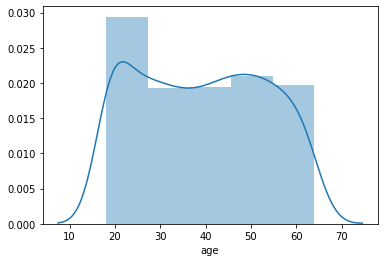

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(insurance_data['age'], kde=True, bins=5)

Observations
- The is a wide spread in age from 18 years to about 64 years
- There is more desity is the age group between 18 years to 20 years.
- The desity of data is pretty much uniform in most of the segments of 20-30, 30-40, 40-50, 50-60, 60 to 64.

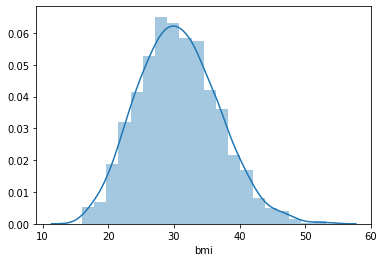

In [32]:
sns.distplot(insurance_data['bmi'], kde=True, bins=20)

Observations
- The distribution of bmi follows a normal distribution with a little skew to the right
- The peak can be seen at the mean value of 30 which matches what we saw earlier

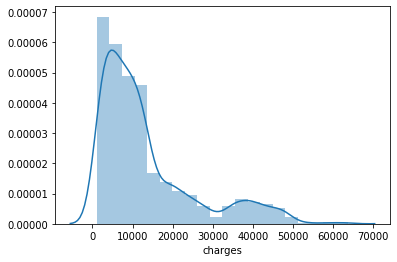

In [33]:
sns.distplot(insurance_data['charges'], kde=True, bins=20)

Observations
- The distribution of charges is heavy on the lower side with lots of data points till 30000 and skewed to the right with outliars to the right
- The mean is greater than the median which proves right skewed distribution

# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [46]:
print('skewness for age:', insurance_data['age'].skew())

skewness for age: 0.05567251565299186


In [47]:
print('skewness for bmi:',insurance_data['bmi'].skew())

skewness for bmi: 0.2840471105987448


In [48]:
print('skewness for charges:',insurance_data['charges'].skew())

skewness for charges: 1.5158796580240388


In [315]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_data.bmi),stats.skew(insurance_data.age),stats.skew(insurance_data.charges)]},
                        index=['bmi','age','charges']) 
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Observations
Skewness is a measure of the symmetry in a distribution. A normal distribution will have a skewness of 0.
- age and bmi have skewness close to zero which means the distribution is close to normal.
- charges have skewness > 1 at 1.5 means its highly right skewed

# g. Checking the presence of outliers in ‘bmi’, ‘age’ and charges columns

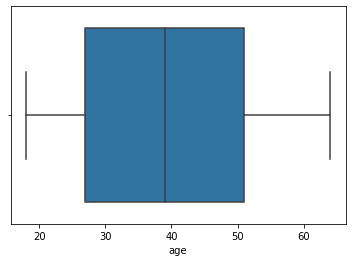

In [49]:
#Use box plot to check for the outliars detection
sns.boxplot(insurance_data['age'])

No outliars

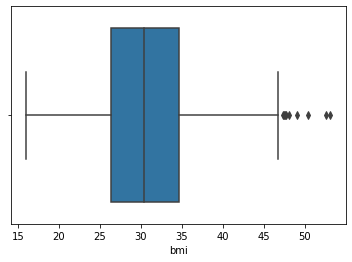

In [50]:
sns.boxplot(insurance_data['bmi'])

In [ ]:
outliars to the right. Quite a few datapoints outside the right whisker shows the skewness to the right.

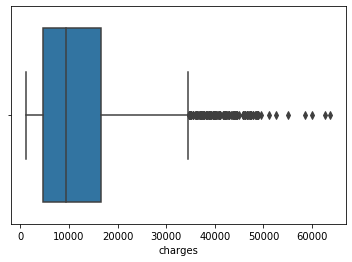

In [51]:
sns.boxplot(insurance_data['charges'])

In [ ]:
outliars to the right. Lot of datapoints outside the right whisker shows the highly skewnedness to right.

# h. Distribution of categorical columns (include children)

sex smoke region children columns

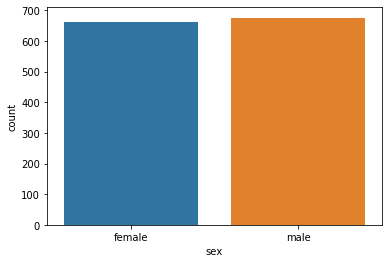

In [71]:
sns.countplot(x="sex", data=insurance_data)

Shows the count of number of males and female in the dataset

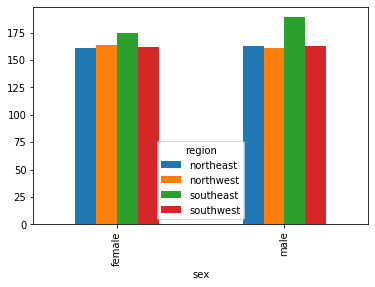

In [70]:
insurance_data.groupby(['sex', 'region']).size().unstack().plot(kind='bar', stacked=False)

Shows the distribution of male and female against different regions
- It can be seen the southeast region has more number of male and female compared to the other regions of which males are higher than females.

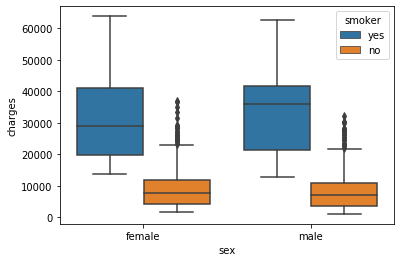

In [78]:
sns.boxplot(x=insurance_data['sex'], y=insurance_data['charges'], hue="smoker", data=insurance_data)

Shows the distribution of charges for male and female taking into account the smoking patterns.
- It can be found that both male and female who smoke have higher charges

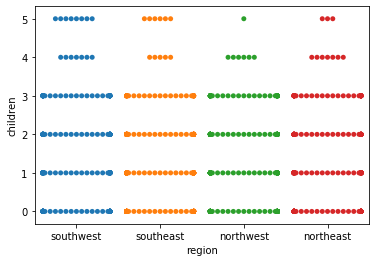

In [80]:
#children and region
sns.swarmplot(insurance_data['region'], insurance_data['children'])

Shows the distribution of people from different regions and the number of children/dependents that have the health insurance coverred. 
- It can be seen that very few people of northwest have cover for insurance have 5 children
- Maximum insurance coverage for people with 5 children are from southwest 
- All regions have a similar overall insurance coverage for people not having or having 1, 2 or 3 children 

In [235]:
insurance_data.groupby(['children', 'region']).size().unstack()

region,northeast,northwest,southeast,southwest
children,,,,
0,147,132,157,138
1,77,74,95,78
2,51,66,66,57
3,39,46,35,37
4,7,6,5,7
5,3,1,6,8


# i. Pairplot that includes all the columns of the dataframe

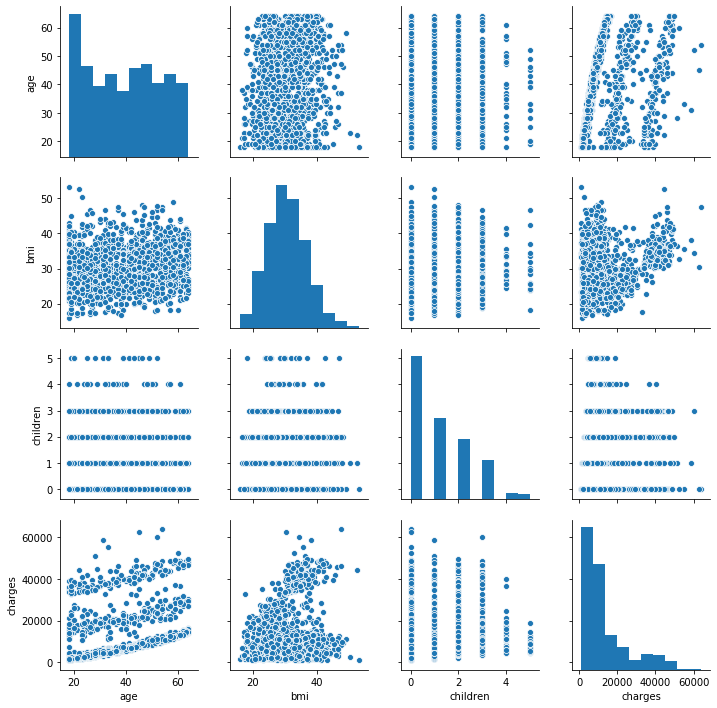

In [95]:
sns.pairplot(insurance_data)

# Answer the following questions with statistical evidence

# a. Do charges of people who smoke differ significantly from the people who don't?

Our null hypothesis in this case is that there is no statistically significant difference in the changes of people who smoke and who don't
i.e. mean of the charges is same for people who smoke and those who don't

In [151]:
from scipy.stats import ttest_ind, mannwhitneyu, levene, shapiro

smoke_charge = insurance_data[insurance_data['smoker']=="yes"]["charges"]
nosmoke_charge = insurance_data[insurance_data['smoker']=="no"]["charges"]

We have two independent samples here, so we perform two sample test.
Check if the data is normally distributed or not
If the data is normally distributed, if so use ttest_ind
If the data is not normally distributed, use manwhitneyu

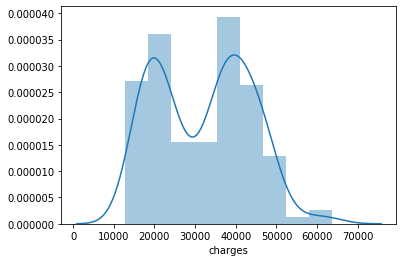

In [144]:
sns.distplot(smoke_charge)

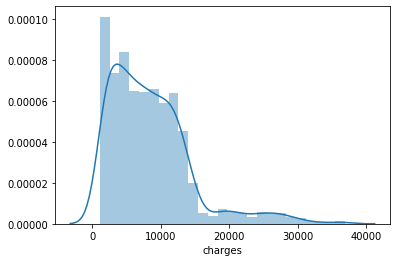

In [145]:
sns.distplot(nosmoke_charge)

The data doesnt follow normal distribution with skewness to the right, so we use manwhitneyu

In [149]:
#t_statistic, p_value = ttest_ind(smoke_charge, nosmoke_charge)
t_statistic, p_value = mannwhitneyu(smoke_charge, nosmoke_charge)
print(t_statistic, p_value)

7403.0 2.6351167222517853e-130


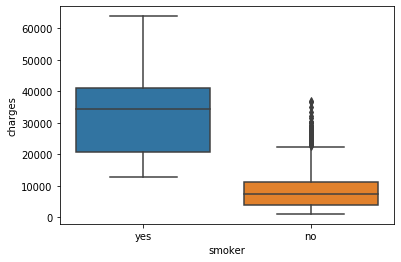

In [140]:
sns.boxplot(x=insurance_data['smoker'], y=insurance_data['charges'], data=insurance_data)

Conclusion
p_value < 0.05 from mannwhitneyu test means we need to reject null hypothesis which means there is statistically significant difference in the charges for people who smoke and those who don't. The boxplot confirms the same.

# b. Does bmi of males differ significantly from that of females?

Our null hypothesis in this case is that there is no statistically significant difference in the bmi of male and female
i.e. mean of the bmi is same for male and female

In [153]:
bmi_male = insurance_data[insurance_data['sex'] == "male"]["bmi"]
bmi_female = insurance_data[insurance_data['sex'] == "female"]["bmi"]

We have two independent samples here, so we perform two sample test.
Check if the data is normally distributed or not
If the data is normally distributed, if so use ttest_ind
If the data is not normally distributed, use manwhitneyu

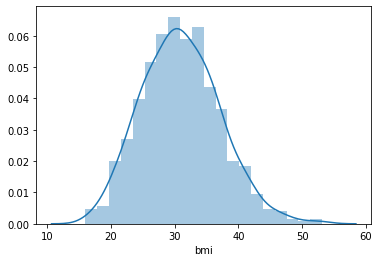

In [154]:
sns.distplot(bmi_male)

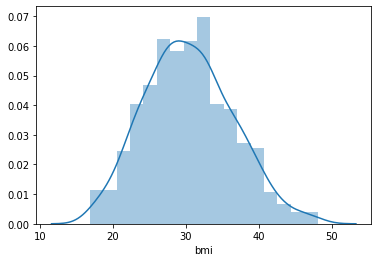

In [163]:
sns.distplot(bmi_female)

The data follows a close to normal distribution with little skewness to the right, we can choose ttest_ind

In [164]:
t_statistic, p_value = ttest_ind(bmi_male, bmi_female)
#t_statistic, p_value = mannwhitneyu(bmi_male, bmi_female)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


Conclusion
p_value > 0.05 means we need to accept null hypothesis which means there is statistically NO significant difference in the bmi for male and female

In [166]:
levene(bmi_male, bmi_female)

LeveneResult(statistic=0.0039394029791134, pvalue=0.949963293424026)

# c. Is the proportion of smokers significantly different in different genders?

smoker and sex columns are categorical so we use chisquare and chi2_contingency

In [189]:
from scipy.stats import chisquare, chi2_contingency, chi2

chisquare test on the two categorical variables confirms the proportion of smokers
Null Hypothesis - The proportion of smokers who are male and female are same
Alternate Hypothesis - The proportion of smokers who are male and female are different

In [196]:
cont= pd.crosstab(insurance_data['smoker'], insurance_data['sex'])
cont

sex,female,male
smoker,,
no,547,517
yes,115,159


By looking at the above contingency table, we can see that the male proption have a comparatively higher rate of smoking than females.

In [202]:
prob = 0.95
stat, p_value, dof, expected = chi2_contingency(cont)
print(p_value)

# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('p-value < 0.05 Dependent (reject H0)')
else:
    print('p-value > 0.05 Independent (fail to reject H0)')

0.006548143503580696
p-value < 0.05 Dependent (reject H0)


In [204]:
# interpret test-statistic
critical = chi2.ppf(prob, dof)
print(stat)
print(critical)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

7.39291081459996
3.841458820694124
Dependent (reject H0)


In [180]:
chisquare(insurance_data['smoker'].value_counts())

Power_divergenceResult(statistic=466.4424514200299, pvalue=1.9051250973839812e-103)

In [181]:
chisquare(insurance_data['sex'].value_counts())

Power_divergenceResult(statistic=0.14648729446935724, pvalue=0.7019150843224216)

Conclusion
p-value for smoker is < 0.05 which means we reject the null hypothesis which means we accept the alternate hypothesis that the proportion of smokers who are male and female is significantly different

# d. Is the distribution of bmi across women with no children, one child and two children, the same 

In [271]:
female = insurance_data[insurance_data['sex'] == "female"]
female_0_child=female[female['children']==0]
female_1_child=female[female['children']==1]
female_2_child=female[female['children']==2]

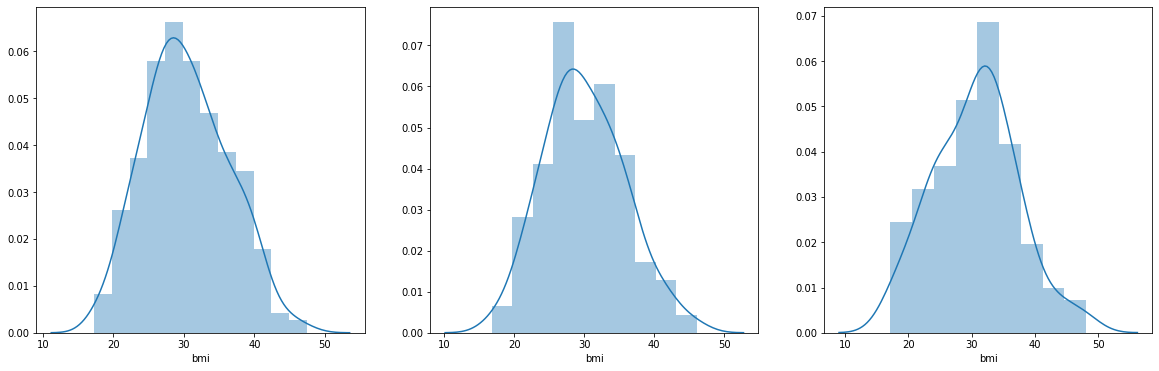

In [313]:
bmi_female_0_child = female_0_child["bmi"]
bmi_female_1_child = female_1_child["bmi"]
bmi_female_2_child = female_2_child["bmi"]
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))
sns.distplot(bmi_female_0_child, ax=ax1)
sns.distplot(bmi_female_1_child, ax=ax2)
sns.distplot(bmi_female_2_child, ax=ax3)

In [296]:
bmi_female_0_child.describe()

count    289.000000
mean      30.361522
std        5.966934
min       17.290000
25%       26.200000
50%       29.925000
75%       34.600000
max       47.410000
Name: bmi, dtype: float64

In [298]:
bmi_female_1_child.describe()

count    158.000000
mean      30.052658
std        5.786831
min       16.815000
25%       25.982500
50%       29.567500
75%       33.942500
max       46.090000
Name: bmi, dtype: float64

In [297]:
bmi_female_2_child.describe()

count    119.00000
mean      30.64979
std        6.62820
min       17.19500
25%       25.77000
50%       31.30000
75%       34.75000
max       48.07000
Name: bmi, dtype: float64

Perform Levene test which tests the variance of the distributions
Null Hypothesis - Variances are equal for the three groups of data (bmi for female with 0, 1 and 2 children)
Alternate Hypothesis - Variances are not equal for the three groups of data (bmi for female with 0, 1 and 2 children)

In [312]:
levene(bmi_female_0_child, bmi_female_1_child, bmi_female_2_child)

LeveneResult(statistic=0.9433311607108589, pvalue=0.3899432394522804)

In [311]:
f_stat, p_value = stats.f_oneway(bmi_female_0_child,bmi_female_1_child,bmi_female_2_child)
print(p_value)

0.7158579926754841


p-value > 0.05 means we accept the null hypothesis and we reject alternate hypothisis.

Observations -
- The mean value of the bmi is around 30 for all the groups
- Levene test confirms that the variance in data for the three groups is same
- T-test confirms number of children has no effect on the bmi